# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alohawabbit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("news_api_key")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_everything = newsapi.get_everything(
    q='BTC' and 'Bitcoin',
    language="en",
    page_size=100,
    sort_by="relevancy",
)

# Print total articles
print(f"Total articles about BTC: {btc_everything['totalResults']}")

# Show sample article
btc_everything['articles'][0]

Total articles about BTC: 4808


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [5]:
# Fetch the Ethereum news articles
eth_everything = newsapi.get_everything(
    q='ETH' and 'Ethereum',
    language="en",
    page_size=100,
    sort_by="relevancy",
)

# Print total articles
print(f"Total articles about ETH: {eth_everything['totalResults']}")

# Show sample article
eth_everything['articles'][0]

Total articles about ETH: 1319


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [6]:
# Create DataFrames
btc_df = pd.DataFrame.from_dict(btc_everything["articles"])
btc_df.rename(columns={'content':'text'},inplace=True)
# btc_df.drop_duplicates(inplace=True)
eth_df = pd.DataFrame.from_dict(eth_everything["articles"])
eth_df.rename(columns={'content':'text'},inplace=True)
# eth_df.drop_duplicates(inplace=True)

In [7]:
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0 
    if score >= 0.05:
        result = 1
    elif score <= -0.05:
        result = -1
        
    return result

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_everything["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_everything["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.146037,0.054235,0.020490,0.925286
std,0.333504,0.060820,0.053286,0.079791
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858500
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.117000,0.000000,1.000000
max,0.811800,0.198000,0.363000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.223294,0.075629,0.021722,0.902660
std,0.360931,0.077265,0.045489,0.087585
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.849000
50%,0.214400,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum** had the highest mean positive score.

Q: Which coin had the highest compound score?

A: **Ethereum** has the highest compound score.

Q. Which coin had the highest positive score?

A: **Ethereum** had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary


In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))

    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [16]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_text = ' '.join(btc_df['text'])
btc_tokenized = tokenizer(btc_text)
btc_bigram_counts = Counter(ngrams(btc_tokenized, n=2))
print(dict(btc_bigram_counts.most_common(20)))

{('virtual', 'currency'): 31, ('reuters', 'bitcoin'): 26, ('currency', 'bitcoin'): 23, ('illustration', 'taken'): 23, ('char', 'reuters'): 21, ('bitcoin', 'seen'): 19, ('reuters', 'stafffile'): 13, ('stafffile', 'photo'): 13, ('representation', 'virtual'): 13, ('taken', 'november'): 12, ('november', 'reutersdado'): 12, ('char', 'london'): 12, ('york', 'reuters'): 12, ('london', 'reuters'): 11, ('photo', 'representations'): 10, ('representations', 'virtual'): 10, ('march', 'reutersdado'): 10, ('photo', 'representation'): 10, ('char', 'file'): 9, ('file', 'photo'): 9}


In [19]:
# Generate the Ethereum N-grams where N=2
eth_text = ' '.join(eth_df['text'])
eth_tokenized = tokenizer(eth_text)
eth_bigram_counts = Counter(ngrams(eth_tokenized, n=2))
print(dict(eth_bigram_counts.most_common(20)))

{('virtual', 'currency'): 10, ('char', 'ethereum'): 8, ('char', 'bitcoin'): 8, ('york', 'reuters'): 7, ('currency', 'bitcoin'): 7, ('illustration', 'taken'): 7, ('reuters', 'bitcoin'): 7, ('photo', 'representation'): 6, ('char', 'new'): 6, ('char', 'reuters'): 6, ('bitcoin', 'seen'): 6, ('bitcoin', 'ethereum'): 6, ('ethereum', 'blockchain'): 6, ('seen', 'illustration'): 5, ('representation', 'virtual'): 5, ('taken', 'november'): 5, ('november', 'reutersdado'): 5, ('ripples', 'xrp'): 5, ('new', 'york'): 4, ('institutional', 'investor'): 4}


In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(btc_tokenized,N=10)

[('char', 97),
 ('bitcoin', 85),
 ('reuters', 70),
 ('currency', 39),
 ('virtual', 33),
 ('photo', 31),
 ('taken', 31),
 ('illustration', 27),
 ('reutersdado', 27),
 ('seen', 26)]

In [22]:
# Get the top 10 words for Ethereum
token_count(eth_tokenized,N=10)

[('char', 97),
 ('ethereum', 52),
 ('bitcoin', 40),
 ('ha', 24),
 ('reuters', 21),
 ('cryptocurrency', 18),
 ('blockchain', 16),
 ('currency', 13),
 ('asset', 13),
 ('price', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

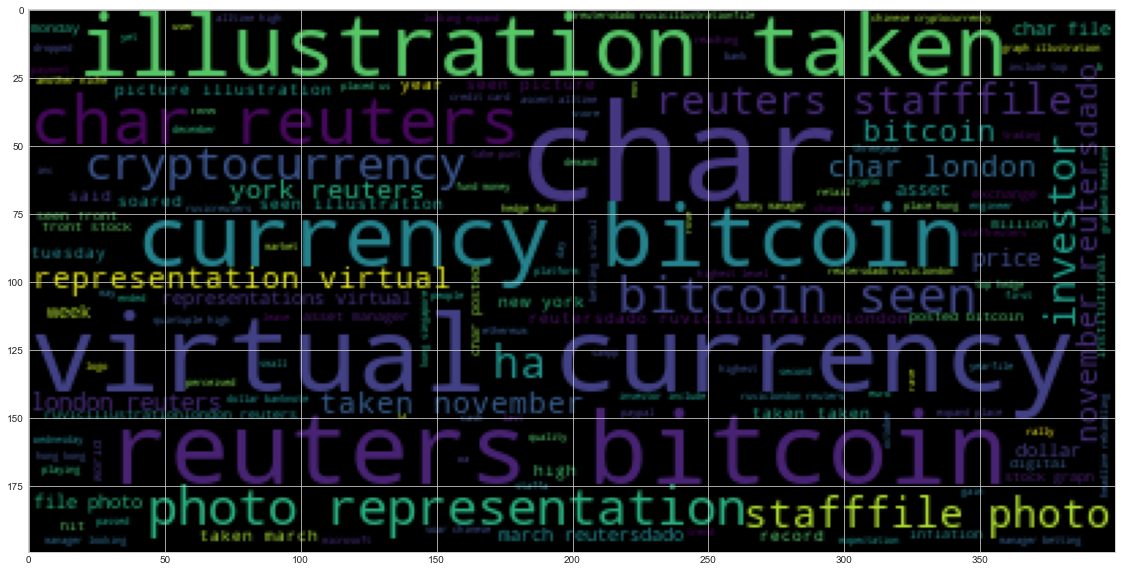

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokenized))
plt.imshow(wc)

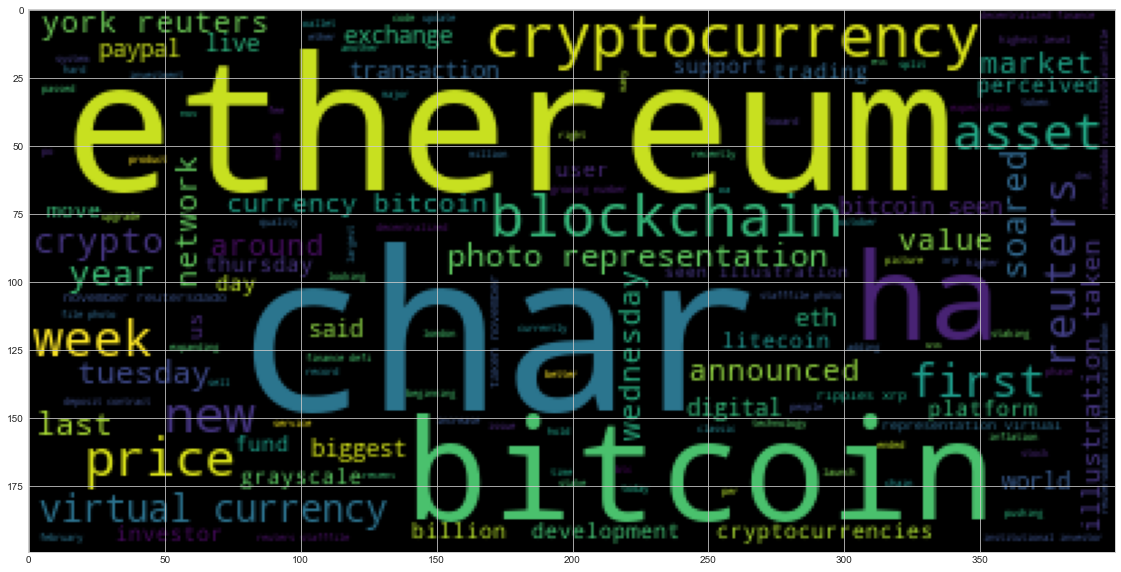

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokenized))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_df['text'])

In [30]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "BTC Named Entity Recognition"
displacy.render(btc_doc, style='ent')

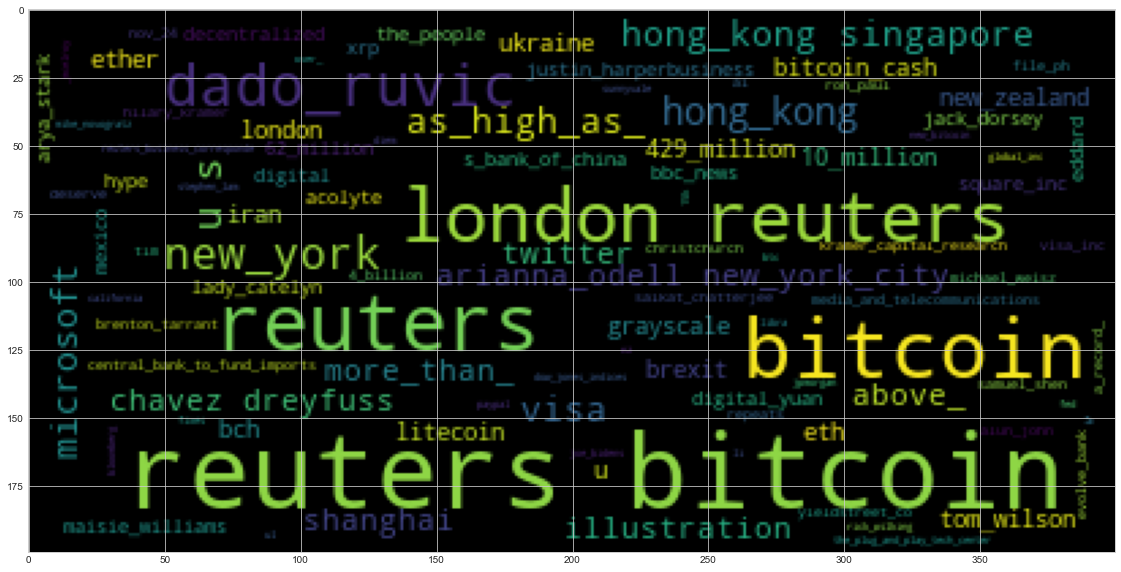

In [31]:
# Render the visualization
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG','PRODECUT','MONEY','PERSON']]
btc_entities = [i.lower().replace(' ', '_') for i in btc_entities]
wc = WordCloud().generate(' '.join(btc_entities))
plt.imshow(wc)

In [32]:
# List all Entities
btc_entity_list = []
for entity in btc_doc.ents:
    btc_entity_list.append(entity.text)
    btc_entity_list.append(entity.label_)
print(btc_entity_list)

['Microsoft', 'ORG', 'Ukraine', 'GPE', 'nine years', 'DATE', 'more than $10 million', 'MONEY', 'Microsoft', 'ORG', '2016 to 2018', 'DATE', 'Visa', 'ORG', 'first', 'ORDINAL', 'Bitcoin', 'GPE', 'PayPal', 'PRODUCT', 'US', 'GPE', 'first', 'ORDINAL', 'US', 'GPE', 'October', 'DATE', 'November 2017', 'DATE', 'two-month', 'DATE', 'Bitcoin', 'GPE', '10,000', 'MONEY', 'first', 'ORDINAL', 'the next 20 days', 'DATE', '19,665', 'MONEY', 'digital yuan', 'ORG', 'the People’s Bank of China', 'ORG', 'the past few weeks', 'DATE', 'bitcoin', 'GPE', 'digital', 'ORG', 'hype', 'GPE', 'Six years', 'DATE', 'Mexico', 'GPE', '$62 million', 'MONEY', 'Decentralized', 'GPE', '4', 'CARDINAL', 'U.S.', 'GPE', 'November', 'DATE', 'today', 'DATE', '500', 'CARDINAL', '10.8 percent', 'PERCENT', 'November', 'DATE', 'monthly', 'DATE', 'April', 'DATE', 'fourth', 'ORDINAL', 'Maisie Williams', 'PERSON', 'Arya Stark', 'PERSON', 'Lady Catelyn', 'PERSON', 'Eddard', 'PERSON', 'acolyte', 'PERSON', 'the Faceless Men', 'WORK_OF_ART'

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df['text'])

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "ETH Named Entity Recognition"
displacy.render(eth_doc, style='ent')

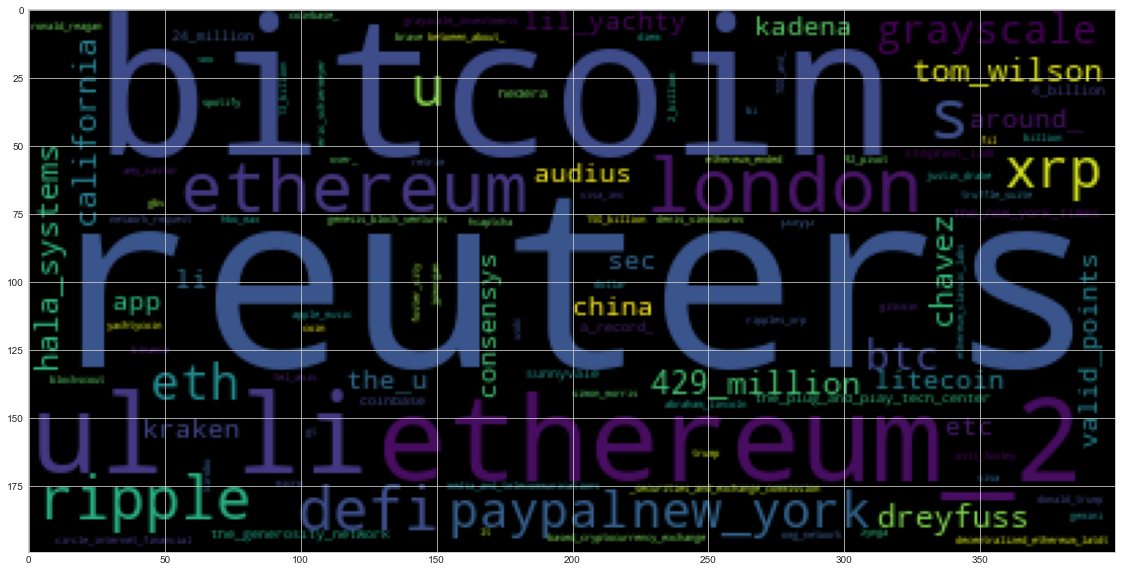

In [35]:
# Render the visualization
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG','PRODECUT','MONEY','PERSON']]
eth_entities = [i.lower().replace(' ', '_') for i in eth_entities]
wc = WordCloud().generate(' '.join(eth_entities))
plt.imshow(wc)

In [36]:
# List all Entities
eth_entity_list = []
for entity in eth_doc.ents:
    eth_entity_list.append(entity.text)
    eth_entity_list.append(entity.label_)
print(eth_entity_list)

['PayPal', 'PRODUCT', 'US', 'GPE', 'first', 'ORDINAL', 'US', 'GPE', 'October', 'DATE', 'February 3, 2018', 'DATE', 'REUTERS/', 'ORG', 'Reuters', 'ORG', 'February 3, 2018', 'DATE', 'REUTERS/', 'ORG', 'Reuters', 'ORG', 'LONDON', 'GPE', 'Reuters', 'ORG', 'XRP', 'ORG', 'Monday', 'DATE', 'NEW YORK', 'PERSON', 'Reuters', 'ORG', '$429 million', 'MONEY', 'the week ended Dec. 7', 'DATE', 'second', 'ORDINAL', 'NEW YORK', 'PERSON', 'Reuters', 'ORG', '$429 million', 'MONEY', 'the week ended Dec. 7', 'DATE', 'second', 'ORDINAL', 'PayPal', 'PERSON', 'the Generosity Network', 'ORG', '20,000', 'MONEY', 'Reuters', 'ORG', 'Bitcoin', 'GPE', 'November 19, 2020', 'DATE', 'REUTERS/', 'ORG', 'Reuters', 'ORG', 'Bitcoin', 'GPE', 'November 19, 2020', 'DATE', 'REUTERS/', 'ORG', 'The New York Times', 'ORG', 'Coinbase', 'ORG', 'early February this year', 'DATE', 'last month', 'DATE', 'October', 'DATE', '$24 million', 'MONEY', 'Reuters', 'ORG', 'Bitcoin', 'GPE', 'November 19, 2020', 'DATE', 'REUTERS/', 'ORG', 'Reut

---